In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [7]:
file_path = "data\\avito_new_data_for_dano_firs_gip.xlsx"
data = pd.read_excel(file_path)

# Просмотр первых строк данных
print(data.head())

               item_id category  days_active  has_video  photo_count  \
0  8076197464449224704   Собаки            5      False            4   
1  2301513707259929088   Собаки           25      False            2   
2  4342659728781161984    Кошки           25      False            4   
3  8692771077297838080    Кошки           25       True            1   
4  6210575840772697088    Кошки           18      False            4   

                  title  title_length  description_length  \
0    Харизматичный друг            18                1155   
1  Собака в добрые руки            20                  49   
2            Добрый кот            10                 354   
3     Кот в добрые руки            17                 869   
4            Просто кот            10                  30   

   description_word_count                                      DescriptionRu  \
0                     184  Кто это? \nПлохой мальчик? \nМафиозный авторит...   
1                       7  осталась одна

In [9]:
# Удаление строк с пропущенными значениями
data = data.dropna()

# Пример: Кодирование категориальных данных
data['category'] = data['category'].astype('category').cat.codes

# Разделение на признаки (X) и целевую переменную (y)
X = data[['photo_count', 'has_video']]  # Замените на названия ваших столбцов
y = data['cr']  # Замените на название целевой переменной


In [10]:

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:


# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE (среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# R^2 (коэффициент детерминации)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

MSE: 5.30
R^2: 0.00


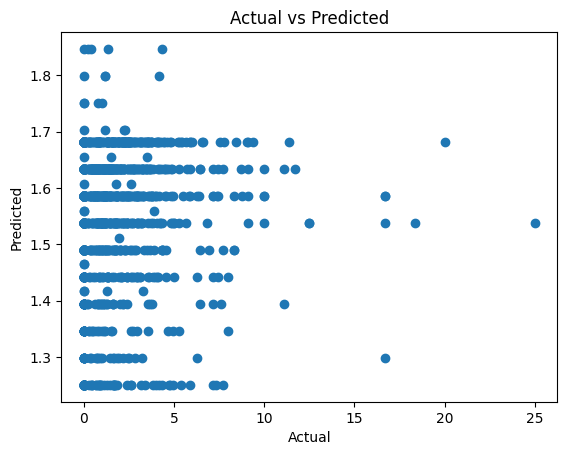

In [18]:
import matplotlib.pyplot as plt

# Визуализация предсказанных и реальных значений
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
